Topic:        Challenge Set 5

Subject:      Linear Splitting

Date:         01/28/2018

Name:         Will Stokvis


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np
%matplotlib inline

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_movies = pd.read_csv('/Users/williamstokvis/Education/metis/nyc18_ds14/challenges/challenges_data/2013_movies.csv')

In [3]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
df_movies.tail()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


In [5]:
df_movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [6]:
df_movies.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [7]:
df_movies.shape

(100, 7)

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [8]:
df_movies['dummy_ones'] = 1

In [9]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,dummy_ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [10]:
y, X = patsy.dmatrices("DomesticTotalGross ~ dummy_ones", data=df_movies, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
# what is happening when we call fit?
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 28 Jan 2018   Prob (F-statistic):                nan
Time:                        15:36:09   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
dummy_ones   5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

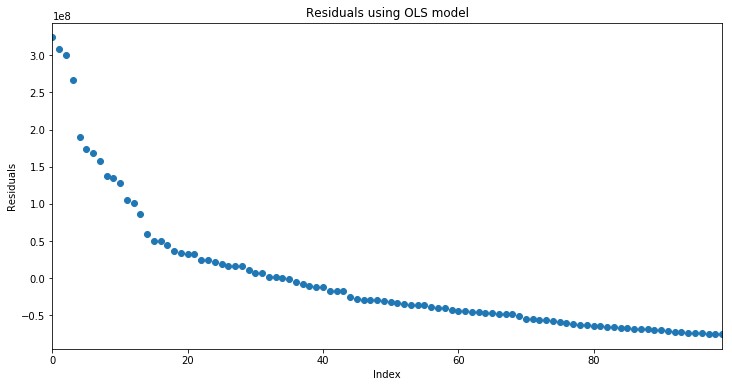

In [11]:
fit.resid.plot(style= 'o', figsize= (12,6))
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals using OLS model');

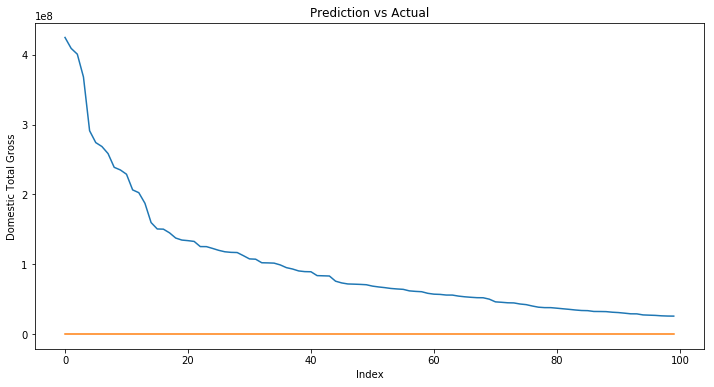

In [12]:
plt.figure(figsize = (12,6))
plt.plot(y)
plt.plot(df_movies['dummy_ones'])
plt.xlabel('Index')
plt.ylabel('Domestic Total Gross')
plt.title('Prediction vs Actual');

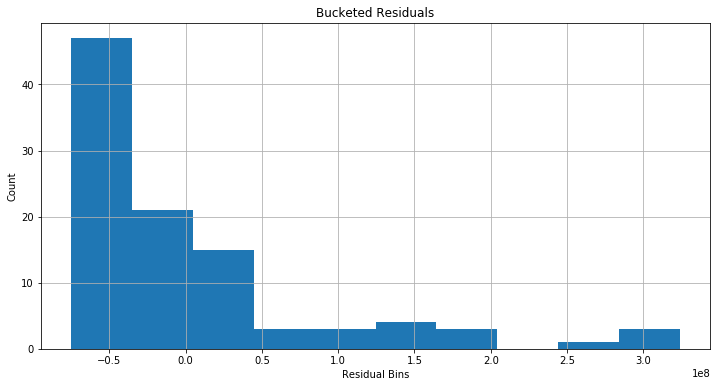

In [13]:
plt.figure(figsize = (12,6))
fit.resid.hist()
plt.xlabel('Residual Bins')
plt.ylabel('Count')
plt.title('Bucketed Residuals');

The residuals are skewed to the right. This indicates a poor fit and that we should revisit the model

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [14]:
y1, X1 = patsy.dmatrices("DomesticTotalGross ~ Budget + dummy_ones", data=df_movies, return_type="dataframe")
# Create your model
model1 = sm.OLS(y1, X1)
# Fit your model to your training set
# what is happening when we call fit?
fit1 = model1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        15:36:09   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
dummy_ones   2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     8.19e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

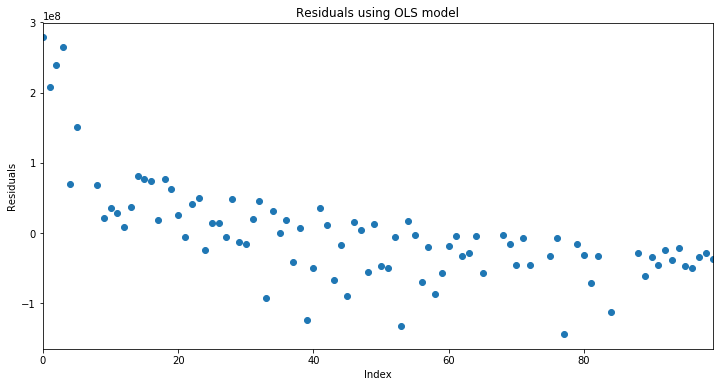

In [15]:
fit1.resid.plot(style= 'o', figsize= (12,6))
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals using OLS model');

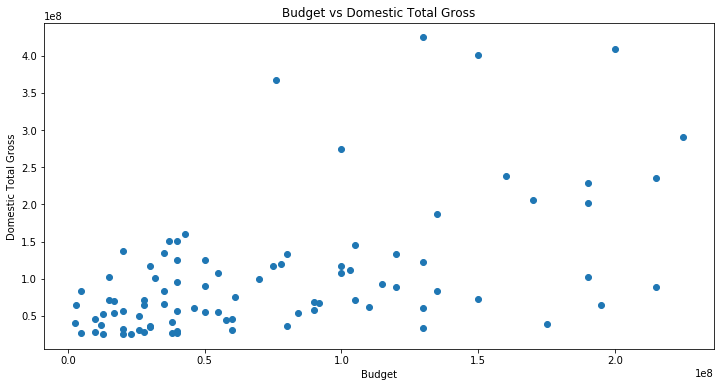

In [16]:
plt.figure(figsize = (12,6))
plt.scatter(df_movies['Budget'],df_movies['DomesticTotalGross'])
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')
plt.title('Budget vs Domestic Total Gross');

As budget increases, we are less and less able to predict Domestic Total Gross

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [17]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,dummy_ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [18]:
df_movies = pd.get_dummies(df_movies, columns=['Rating'], prefix='Rating', drop_first=True)

In [19]:
df_movies.rename(columns={'Rating_PG-13': 'Rating_PG13'}, inplace = True)

In [20]:
df_movies.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Runtime                 int64
ReleaseDate            object
dummy_ones              int64
Rating_PG               uint8
Rating_PG13             uint8
Rating_R                uint8
dtype: object

In [21]:
y2, X2 = patsy.dmatrices("DomesticTotalGross ~ Rating_PG + Rating_PG13 + Rating_R + Budget + dummy_ones", data=df_movies, return_type="dataframe")
# Create your model
model2 = sm.OLS(y2, X2)
# Fit your model to your training set
# what is happening when we call fit?
fit2 = model2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.87e-06
Time:                        15:36:10   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.029e+07   6.21e+06      3.270      0.002    7.95e+06    3.26e+07
Rating_PG    1.714e+07   1.53e+07      1.122      0.265   -1.32e+07    4.75e+07
Rating_PG13 -1.257e+05   1.17e+07     -0.011      0.991   -2.33e+07     2.3e+07
Rating_R     3.275e+06    1.2e+07      0.273      0.786   -2.06e+07    2.71e+07
Budget          0.7816      0.152      5.157      0.000       0.480       1.083
dummy_ones   2.029e+07   6.21e+06      3.270      0.002    7.95e+06    3.26e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     1.61e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
df_movies.groupby('Rating').count()

KeyError: 'Rating'

A movie's rating is not a very good predictor of its success. This could be due to the fact that there are only few categories as well as due to the fact that there is only a limited amount of data.

### Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [ ]:
df_movies.columns

In [ ]:
df_movies.corr()

In [ ]:
df_movies['Director'] = df_movies['Director'].astype('category')

In [23]:
df_movies['Budget_Log'] = df_movies['Budget'].transform(lambda x: np.log(x))
df_movies['DomesticTotalGross_Log'] = df_movies['DomesticTotalGross'].transform(lambda x: np.log(x))

In [24]:
df_movies['ReleaseDate'] = pd.to_datetime(df_movies['ReleaseDate'])

In [25]:
df_movies['Release_Month'] = df_movies['ReleaseDate'].apply(lambda x: x.month)
df_movies['Release_Year'] = df_movies['ReleaseDate'].apply(lambda x: x.year)

In [26]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,dummy_ones,Rating_PG,Rating_PG13,Rating_R,Budget_Log,DomesticTotalGross_Log,Release_Month,Release_Year
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22,1,0,1,0,18.683045,19.866818,11,2013
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03,1,0,1,0,19.113828,19.829260,5,2013
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,108,2013-11-22,1,1,0,0,18.826146,19.808818,11,2013
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,98,2013-07-03,1,1,0,0,18.146244,19.723760,7,2013
4,Man of Steel,225000000.0,291045518,Zack Snyder,143,2013-06-14,1,0,1,0,19.231611,19.488990,6,2013


In [27]:
y3, X3 = patsy.dmatrices("DomesticTotalGross_Log ~ Runtime + Budget_Log + Rating_PG + Rating_PG13 + Rating_R", data=df_movies, return_type="dataframe")
# Create your model
model3 = sm.OLS(y3, X3)
# Fit your model to your training set
# what is happening when we call fit?
fit3 = model3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     DomesticTotalGross_Log   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.249
Method:                     Least Squares   F-statistic:                     8.300
Date:                    Sun, 28 Jan 2018   Prob (F-statistic):           1.08e-05
Time:                            15:36:11   Log-Likelihood:                -80.654
No. Observations:                      89   AIC:                             171.3
Df Residuals:                          84   BIC:                             183.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0044      0.990      9.098      0.000       7.036      10.972
Runtime         0.0061      0.004      1.395      0.167      -0.003       0.015
Budget_Log      0.3111      0.082      3.811      0.000       0.149       0.473
Rating_PG       3.1161      0.388      8.023      0.000       2.344       3.888
Rating_PG13     2.9559      0.356      8.292      0.000       2.247       3.665
Rating_R        2.9324      0.296      9.915      0.000       2.344       3.521
==============================================================================
Omnibus:                        3.888   Durbin-Watson:                   0.726
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.316
Skew:                           0.162   Prob(JB):                        0.314
Kurtosis:                       2.279   Cond. No.                     9.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* High Condition Number is worrying as it may indicate multicollinearity

### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25)

In [30]:
rcv = RidgeCV(cv=10)

Linear Regression

In [31]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.16376266631999792

Ridge Regression

In [32]:
rcv.fit(X3,y3)
rcv.score(X_test, y_test)

0.19195924262136574

That's certainly not good to see. My first reaction is that we need a lot more data to start seeing patterns. Our original data set is only 100 movies and trying to model on a train size of 75% that is gonna give us some wild results